# Resume Parsing

## 1. Load data

In [1]:
import pandas as pd
import numpy as np

df_resume = pd.read_csv("./app/data/Resume.csv")
df_resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [2]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [3]:
df_resume.shape

(2484, 4)

In [4]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume

,ID,Resume_str,Resume_html,Category
397,19302310,DIRECTOR/PRESCHOOL TEACHER Summ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
2312,11995013,LINE ATTENDANT Summary Resu...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
1217,11835339,CONSULTANT TO OWNER Educati...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT
1518,11441764,FINANCE MANAGER Summary P...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
826,15293959,CERTIFIED MASTER PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
...,...,...,...,...
583,12546838,BUSINESS DEVELOPMENT MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT
2069,14364597,PUBLIC RELATIONS & DEVELOPMENT ASSOCI...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS
507,15727656,TRANSITIONAL HOUSING ADVOCATE S...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
636,13199813,DIRECTOR OF BUSINESS DEVELOPMENT ...,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT


In [5]:
df_resume = df_resume.copy().iloc[:1000, ]
df_resume

,ID,Resume_str,Resume_html,Category
397,19302310,DIRECTOR/PRESCHOOL TEACHER Summ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
2312,11995013,LINE ATTENDANT Summary Resu...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
1217,11835339,CONSULTANT TO OWNER Educati...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT
1518,11441764,FINANCE MANAGER Summary P...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
826,15293959,CERTIFIED MASTER PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
...,...,...,...,...
1055,33236701,SALES ASSOCIATE Professional Pr...,"<div class=""fontsize fontface vmargins hmargin...",SALES
2302,50432401,OPERATIONS COORDINATOR Summ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
964,69360287,CUSTOMER SERVICE SPECIALIST III ...,"<div class=""fontsize fontface vmargins hmargin...",AGRICULTURE
50,30646367,HR ASSISTANT/PAYROLL Highligh...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df_resume.shape

(1000, 4)

## 2. Load skill data

If we define patterns for all the skill, we gonna be too tired.

So spacy knows that, so it allows you to give you a list of words, then it will automatically create pattern.

In [7]:
import spacy

nlp        = spacy.load('en_core_web_md')
ruler = nlp.add_pipe("entity_ruler")


/home/koala/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
skill_path = './app/data/jz_skill_patterns.jsonl'
ruler.from_disk(skill_path) 
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [9]:
doc = nlp("Chaky loves ajax.")
doc.ents

(Chaky, ajax)

In [10]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Chaky NORP
ajax SKILL


## 3. Let's try to extract skills from this resume.csv

In [11]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
397,19302310,DIRECTOR/PRESCHOOL TEACHER Summ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
2312,11995013,LINE ATTENDANT Summary Resu...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
1217,11835339,CONSULTANT TO OWNER Educati...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT
1518,11441764,FINANCE MANAGER Summary P...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
826,15293959,CERTIFIED MASTER PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS


In [12]:
#clean our data

from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sentence):

    stopwords    = list(STOP_WORDS)
    doc          = nlp(sentence)
    clean_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SYM' and \
            token.pos_ != 'SPACE':
                clean_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(clean_tokens)

In [13]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         IT MANAGEMENT           Career Overview    Detail-oriented professional with extensive Information Technology experience in hardware and software troubleshooting/management. With additional experience in networking, task automation, server technologies, digital graphic design, client + serv'

In [14]:
preprocessing(random_resume[:300])

'it management career overview detail orient professional extensive information technology experience hardware software troubleshooting management with additional experience networking task automation server technology digital graphic design client + serv'

In [15]:
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

In [16]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
397,19302310,DIRECTOR/PRESCHOOL TEACHER Summ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,director preschool teacher summary personable ...
2312,11995013,LINE ATTENDANT Summary Resu...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,line attendant summary result orient superviso...
1217,11835339,CONSULTANT TO OWNER Educati...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant to owner education florida internat...
1518,11441764,FINANCE MANAGER Summary P...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE,finance manager summary pro - active result or...
826,15293959,CERTIFIED MASTER PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,certified master personal trainer professional...


## 4. Let's really extract skills!!

In [17]:
import re
def get_skills(text):
    
    doc = nlp(text)
    
    skills = []
    
    for ent in doc.ents:
        if re.match(r'^SKILL', ent.label_):
            skills.append(ent.text)
            
    return skills

def unique_skills(x):
    return list(set(x))

In [18]:
df_resume = df_resume[:100]

In [19]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

/tmp/ipykernel_67119/138658587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
/tmp/ipykernel_67119/138658587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resume['Skills'] = df_resume.Skills.apply(unique_skills)


In [20]:
df_resume.Skills.iloc[0]

['documentation', 'design', 'support', 'schedule', 'interaction']

In [21]:
df_resume.Skills.iloc[2]

['documentation',
 'design',
 'play',
 'business',
 'certificate',
 'level set',
 'marketing',
 'schedule']

In [22]:
df_resume

,ID,Resume_str,Resume_html,Category,Clean_resume,Skills
397,19302310,DIRECTOR/PRESCHOOL TEACHER Summ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,director preschool teacher summary personable ...,"[documentation, design, support, schedule, int..."
2312,11995013,LINE ATTENDANT Summary Resu...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,line attendant summary result orient superviso...,"[testing, certificate, material, security, sch..."
1217,11835339,CONSULTANT TO OWNER Educati...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant to owner education florida internat...,"[documentation, design, play, business, certif..."
1518,11441764,FINANCE MANAGER Summary P...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE,finance manager summary pro - active result or...,"[finance, documentation, business, business ad..."
826,15293959,CERTIFIED MASTER PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,certified master personal trainer professional...,"[adobe photoshop, business, marketing, schedul..."
...,...,...,...,...,...,...
1303,42156237,SENIOR DIGITAL MARKETING ANALYST ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,senior digital marketing analyst summary highl...,"[regression analysis, mysql, business administ..."
1398,91591026,EXECUTIVE CHEF Professional S...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,executive chef professional summary to join or...,"[documentation, testing, business, passenger, ..."
1812,12338274,ACCOUNTANT Summary To pursue...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT,accountant summary to pursue excellence dynami...,"[adobe photoshop, adobe illustrator, finance, ..."
2308,21867728,SENIOR MARKETING AUTOMATION CONSULTAN...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,senior marketing automation consultant summary...,"[email marketing, documentation, project manag..."


## 5. Visualization

Which skills is most important in information management?

In [23]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AVIATION',
 'BANKING',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [24]:
category = 'INFORMATION-TECHNOLOGY'
cond     = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(4, 6)

In [25]:
all_skills = np.concatenate(df_resume_it.Skills.values)

In [26]:
all_skills

array(['content management', 'ios', 'database', 'android', 'java',
       'server', 'cloud storage', 'algorithm', 'wireless', 'windows',
       'graphic design', 'security', 'telephony', 'design', 'javascript',
       'documentation', 'medium', 'support', 'marketing',
       'computer science', 'operating systems', 'engineering',
       'project management', 'search engine', 'component', 'business',
       'certificate', 'diagram', 'software', 'linux', 'ubuntu', 'mobile',
       'access network', 'testing', 'wireless', 'component', 'scanner',
       'router', 'computer network', 'windows', 'software',
       'virtual machine', 'support', 'microcomputer', 'security',
       'engineering', 'server', 'monitoring', 'tower', 'business',
       'diagram', 'software', 'performance monitoring', 'database',
       'network management', 'chemical engineering', 'support',
       'computer science', 'material', 'security', 'engineering',
       'design', 'mobile', 'database', 'python', 'java', 'al

In [27]:
from collections import Counter, OrderedDict

counting = Counter(all_skills)
counting

Counter({'support': 4,
         'engineering': 4,
         'software': 4,
         'database': 3,
         'security': 3,
         'design': 3,
         'component': 3,
         'java': 2,
         'server': 2,
         'algorithm': 2,
         'wireless': 2,
         'windows': 2,
         'documentation': 2,
         'computer science': 2,
         'business': 2,
         'diagram': 2,
         'mobile': 2,
         'testing': 2,
         'content management': 1,
         'ios': 1,
         'android': 1,
         'cloud storage': 1,
         'graphic design': 1,
         'telephony': 1,
         'javascript': 1,
         'medium': 1,
         'marketing': 1,
         'operating systems': 1,
         'project management': 1,
         'search engine': 1,
         'certificate': 1,
         'linux': 1,
         'ubuntu': 1,
         'access network': 1,
         'scanner': 1,
         'router': 1,
         'computer network': 1,
         'virtual machine': 1,
         'microcomputer': 1

In [28]:
counting = OrderedDict(counting.most_common(10))

In [29]:
counting

OrderedDict([('support', 4),
             ('engineering', 4),
             ('software', 4),
             ('database', 3),
             ('security', 3),
             ('design', 3),
             ('component', 3),
             ('java', 2),
             ('server', 2),
             ('algorithm', 2)])

<BarContainer object of 10 artists>

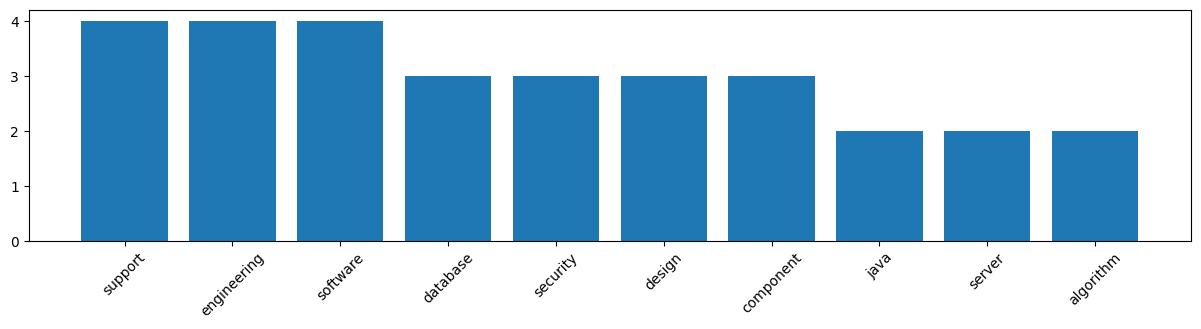

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation=45)

plt.bar(counting.keys(), counting.values())

## 6. Name Entity Recognition

In [31]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[1]
text

"information technology specialist professional profile to continue work information technology field develop skill information systems networking experience information technology specialist april 2015 current company name set maintain network infrastructure wire wireless configuration setup maintain user computer include hardware software set assist user e - mail account i maintain security network company user access network setup configure user android phone access company resource i maintain security company ' machine computer technical specialist september 2007 january 2014 company name － city set maintain software faculty staff computer windows mcintosh environment troubleshoot software hardware problem user machine check network connectivity issue client set maintain printer ' scanner fax machine staff faculty student configure setup pda s faculty staff help maintain lab computer window mcintosh environment include hardware software printing issue assist network administrator s

In [32]:
doc = nlp(text)
doc

information technology specialist professional profile to continue work information technology field develop skill information systems networking experience information technology specialist april 2015 current company name set maintain network infrastructure wire wireless configuration setup maintain user computer include hardware software set assist user e - mail account i maintain security network company user access network setup configure user android phone access company resource i maintain security company ' machine computer technical specialist september 2007 january 2014 company name － city set maintain software faculty staff computer windows mcintosh environment troubleshoot software hardware problem user machine check network connectivity issue client set maintain printer ' scanner fax machine staff faculty student configure setup pda s faculty staff help maintain lab computer window mcintosh environment include hardware software printing issue assist network administrator se

In [33]:
for ent in doc.ents:
    if re.match(r'^SKILL',ent.label_):
        ent.label_ = 'SKILL'
    print(ent.text, ent.label_)

information technology specialist ORG
april 2015 DATE
wireless SKILL
software SKILL
security SKILL
access network SKILL
android ORG
security SKILL
september 2007 DATE
january 2014 DATE
－ city GPE
software SKILL
windows SKILL
software SKILL
scanner SKILL
software SKILL
router SKILL
server SKILL
server SKILL
3 5 CARDINAL
server SKILL
software SKILL
kbox ORG
server SKILL
software SKILL
engineering SKILL
server SKILL
software SKILL
intermapper ORG
server SKILL
virtual machine SKILL
software SKILL
6000 CARDINAL
computer network SKILL
support SKILL
november 2001 DATE
september 2007 DATE
software SKILL
support SKILL
support SKILL
router SKILL
server SKILL
router SKILL
component SKILL
router SKILL
server SKILL
software SKILL
september 1999 DATE
november 2001 DATE
－ city GPE
testing SKILL
software SKILL
server SKILL
software SKILL
router SKILL
server SKILL
windows SKILL
7 CARDINAL
windows SKILL
server SKILL
2012 DATE
mcse microsoft ORG
2003 DATE
1988 DATE
virginia GPE
virginia commonwealth univ

In [34]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style='ent', options=options)

### Add email pattern

In [35]:
email_pattern = [{'label': 'EMAIL', 
                  'pattern': [{'TEXT': {'REGEX': '[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'}}]}]
ruler.add_patterns(email_pattern)

### Add education pattern

In [36]:
education_pattern = [
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["bsc", "bachelor", "bachelor's", "b.a", "b.s"]}}, {"IS_ALPHA": True, "OP": "*"}]},
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["msc", "master", "master's", "m.a", "m.s"]}}, {"IS_ALPHA": True, "OP": "*"}]},
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["phd", "ph.d", "doctor", "doctorate"]}}, {"IS_ALPHA": True, "OP": "*"}]}]
ruler.add_patterns(education_pattern)

### Add website_pattern

In [37]:
web_patterns = [
    {"label": "WEBSITE", "pattern": [{"TEXT": {"REGEX": "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"}}]}]
ruler.add_patterns(web_patterns)


In [57]:
mobile_pattern = [
    {   "label": "MOBILE",
        "pattern": [
            {"TEXT": {"REGEX": r"\+?\d{1,3}"}},  
            {"ORTH": "-", "OP": "?"},           
            {"TEXT": {"REGEX": r"\d{2,3}"}},     
            {"ORTH": "-", "OP": "?"},           
            {"TEXT": {"REGEX": r"\d{3,4}"}},     
            {"ORTH": "-", "OP": "?"},            
            {"TEXT": {"REGEX": r"\d{4}"}}        ]}]

ruler.add_patterns(mobile_pattern)


text = 'my phone number is +66-63-310-9191'
text2 = 'my phone number is +55555555'

doc  = nlp(text)
doc2 = nlp(text2)

for ent in doc.ents:
    print(ent.text, ent.label_)

for ent in doc2.ents:
    print(ent.text, ent.label_)

+66-63-310-9191 PHONE_NUMBER
+55555555 GPE


In [39]:
text = "+66-63-310-919"
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

### Add mobile_pattern

In [40]:
# import re

# pattern = r"\+?(\d{2,3})-(\d{2,3})-(\d{3})-(\d{3})"
# text = "+66-63-310-919"

# match = re.search(pattern, text)
# if match:
#     print("Match found:", match.group())
# else:
#     print("No match found.")


In [41]:
print(ruler.patterns)

[{'label': 'SKILL', 'pattern': [{'TEXT': 'HuggingFace'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': 'PowerBI'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': '.NET'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': ''}, {'LOWER': 'net'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': '1password'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': '3D'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': '3d'}, {'LOWER': 'reconstruction'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'aboutness'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'data'}, {'LOWER': 'type'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'interpretation'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'machine'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'control'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'method'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'network'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'ac

## 7. Let's load the PDF - add some realism

In [48]:
from PyPDF2 import PdfReader

reader = PdfReader("/home/koala/github/NLP/NLP-A4/resume/chaklam_resume.pdf")
page   = reader.pages[0]
text   = page.extract_text()

In [49]:
text

'Chaklam Silpasuwanchai Email : chaklam@ait.asia\nhttp://chaklam.com Mobile : +66-63-310-9191\nhttp://github.com/chaklam-silpasuwanchai\nSkills\n•Language : Python, Java, Javascript\n•Tools/Frameworks : AWS/Azure, PyTorch, HuggingFace, Langchain, SpringBoot, PowerBI\n•Theory : Natural Language Processing, Machine/Deep Learning, Software Engineering / Architecture,\nHuman-Computer Interaction, Brain-Computer Interfaces\nSelected Projects\n•Large Language Models : Develop conversational AI for legal question answering, writing assistant, AI-generated\ndetector, university chatbots, summarization, etc. using large language models.\n•BCI Speller : Develop a real-time speller using EEG for locked-in patients.\n•Non-Invasive Blood Glucose Measuring Using Raman Spectroscopy : Utilize Raman Spectroscopy to\nnon-invasively measure blood glucose.\n•Medical Imaging : Utilize deep learning and language models for medical image analysis and explanations.\nWorking Experience\n•Asian Institute of Tec

In [50]:
# text = preprocessing(text)

In [51]:
text

'Chaklam Silpasuwanchai Email : chaklam@ait.asia\nhttp://chaklam.com Mobile : +66-63-310-9191\nhttp://github.com/chaklam-silpasuwanchai\nSkills\n•Language : Python, Java, Javascript\n•Tools/Frameworks : AWS/Azure, PyTorch, HuggingFace, Langchain, SpringBoot, PowerBI\n•Theory : Natural Language Processing, Machine/Deep Learning, Software Engineering / Architecture,\nHuman-Computer Interaction, Brain-Computer Interfaces\nSelected Projects\n•Large Language Models : Develop conversational AI for legal question answering, writing assistant, AI-generated\ndetector, university chatbots, summarization, etc. using large language models.\n•BCI Speller : Develop a real-time speller using EEG for locked-in patients.\n•Non-Invasive Blood Glucose Measuring Using Raman Spectroscopy : Utilize Raman Spectroscopy to\nnon-invasively measure blood glucose.\n•Medical Imaging : Utilize deep learning and language models for medical image analysis and explanations.\nWorking Experience\n•Asian Institute of Tec

In [52]:
doc = nlp(text)

In [53]:
colors["SKILL"]     = "linear-gradient(90deg, #aa9cfc, #fc9ce7)"
colors["EDUCATION"] = "linear-gradient(90deg, #ffd700, #ff6347)" 
colors["EMAIL"]     = "linear-gradient(90deg, #98fb98, #008000)" 
colors["WEBSITE"]   = "linear-gradient(90deg, #ffff00, #ffdd00)"
colors['MOBILE']    = "linear-gradient(90deg, #ffff00, #FF0000)"

options = {"colors": colors}

displacy.render(doc, style='ent', options=options)